# <font color="Green"> Trabajo Practico Nro 1 </font>

#### Nombre: Bengoechea, Gonzalo
#### DNI: 38254089
#### Materia: Taller II - Big Data y la Salud
#### Docente: Ignacio Romani

# <font color="Green"> Importo las librerias </font>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="notebook", style="dark", palette="Set1", color_codes=True, font_scale=1)

# <font color="Green"> Chequeeo de datos </font>

In [19]:
df = pd.read_csv('./heart_2022_no_nans.csv',delimiter=',')

In [20]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [21]:
print(pd.isnull(df).sum())

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

# <font color="Green"> Analisis </font>

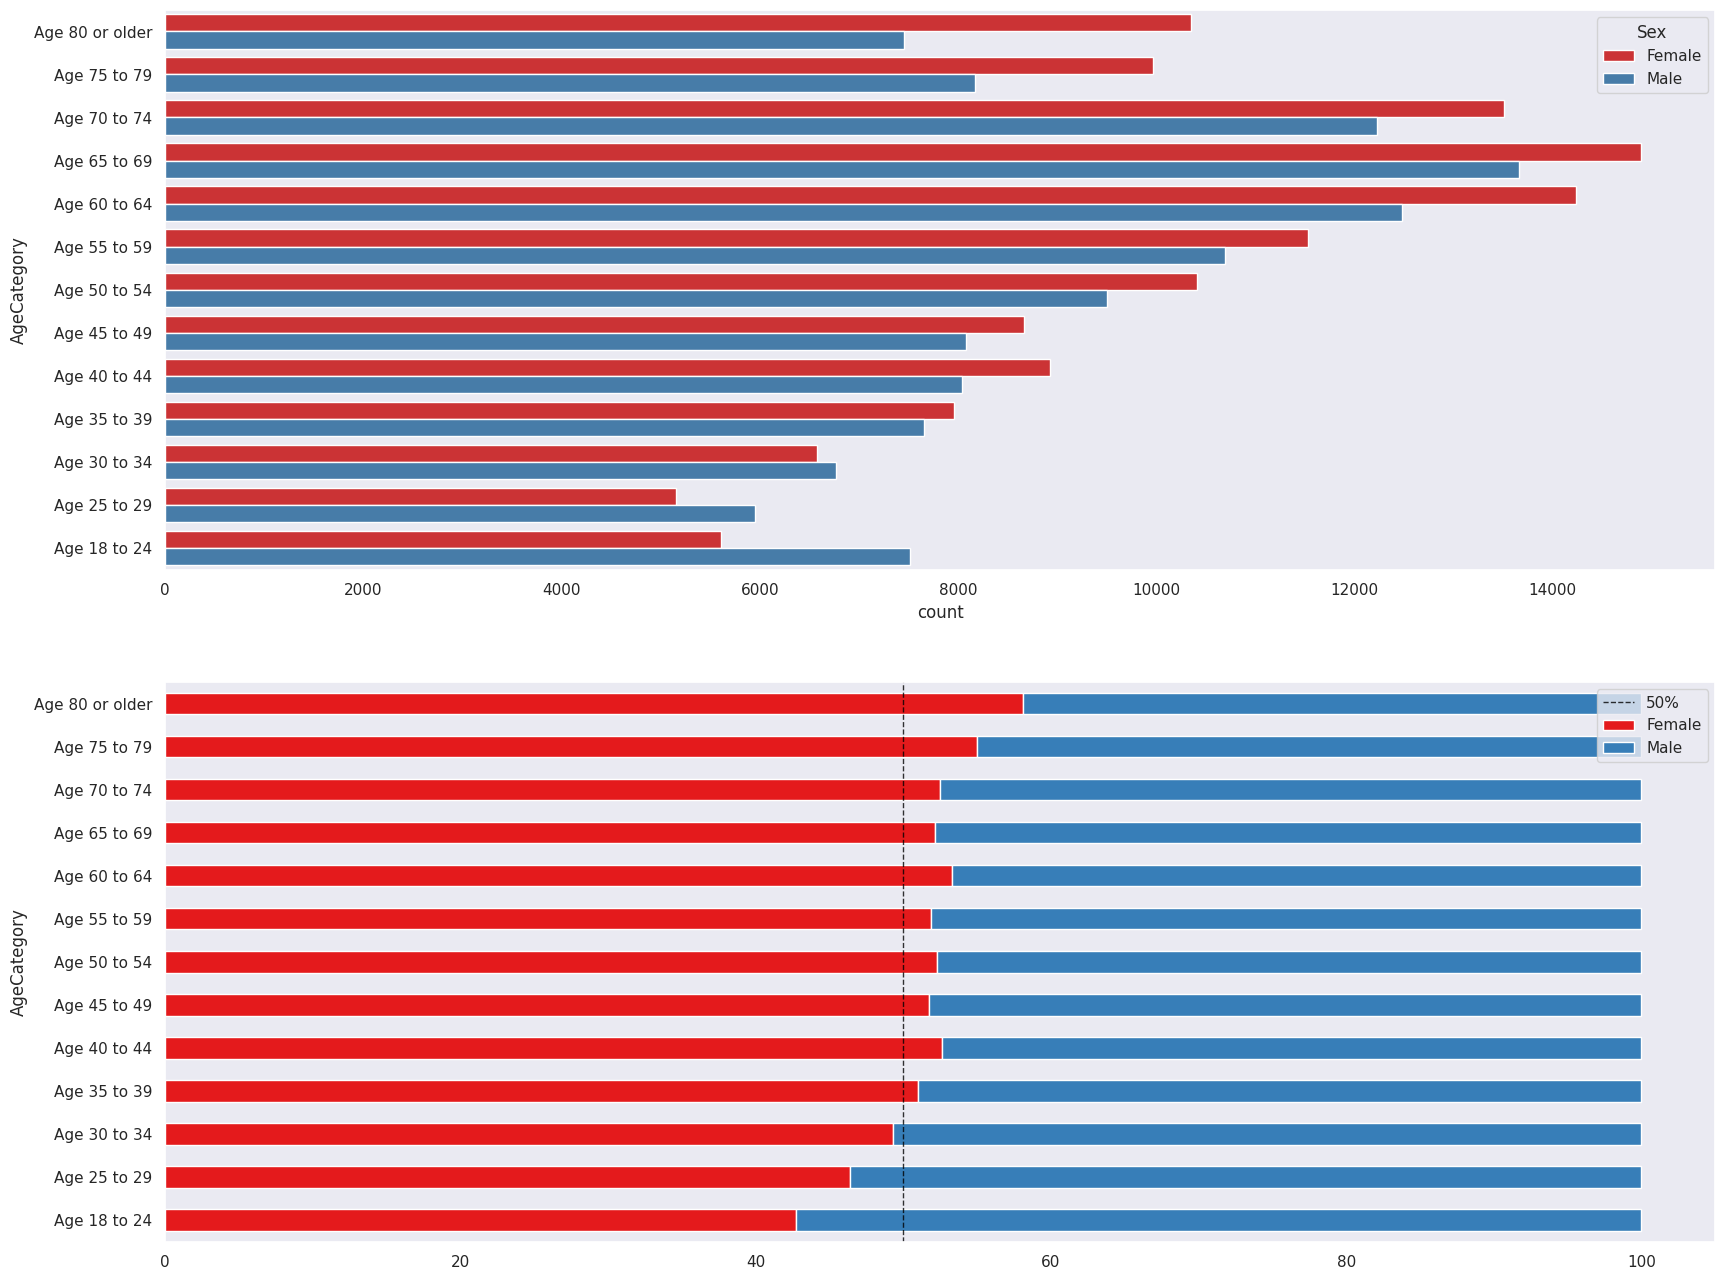

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 16))
order_of_bars_age = [
    'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44',
    'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69',
    'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older'
    ]
sns.countplot(y='AgeCategory', hue="Sex", data=df, order=order_of_bars_age[::-1], ax=ax1)
total = df.groupby(['AgeCategory', 'Sex']).size().unstack(fill_value=0)
total = total.div(total.sum(axis=1), axis=0) * 100
total = total.reindex(order_of_bars_age)
ax = total.plot(kind='barh', stacked=True, ax=ax2)
ax.axvline(x=50, color='black', linestyle='--', linewidth=1, alpha=0.8, label='50%')
plt.legend()

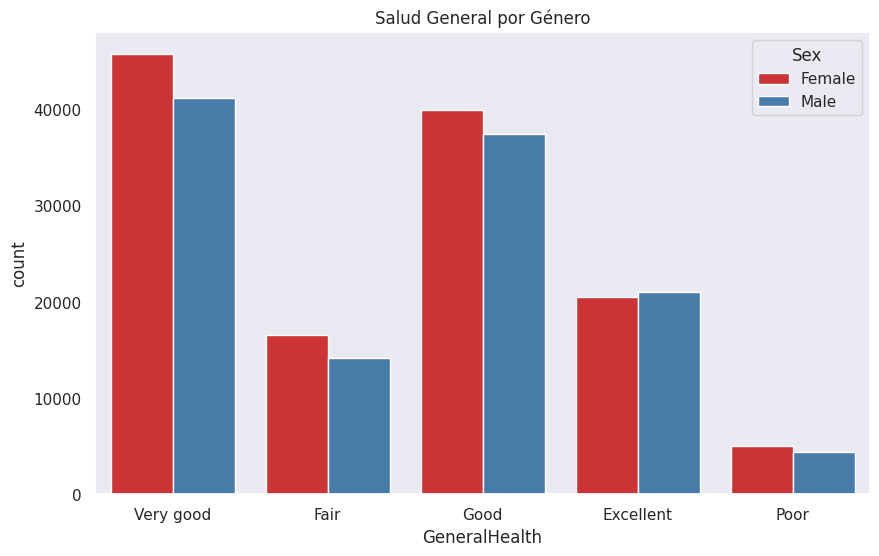

In [40]:
# Gráfico de barras apiladas de la salud general por género
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GeneralHealth', hue='Sex')
plt.title('Salud General por Género')
plt.show()

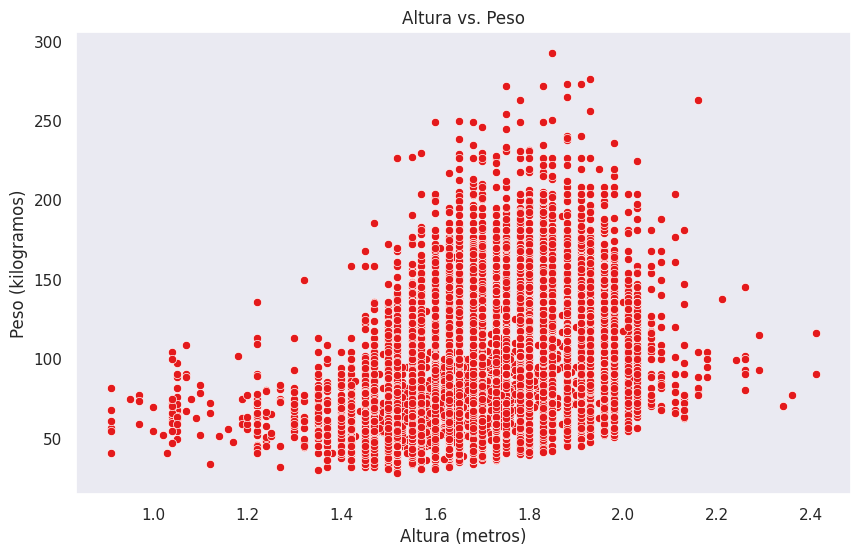

In [41]:
# Gráfico de dispersión de altura vs. peso
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HeightInMeters', y='WeightInKilograms')
plt.title('Altura vs. Peso')
plt.xlabel('Altura (metros)')
plt.ylabel('Peso (kilogramos)')
plt.show()

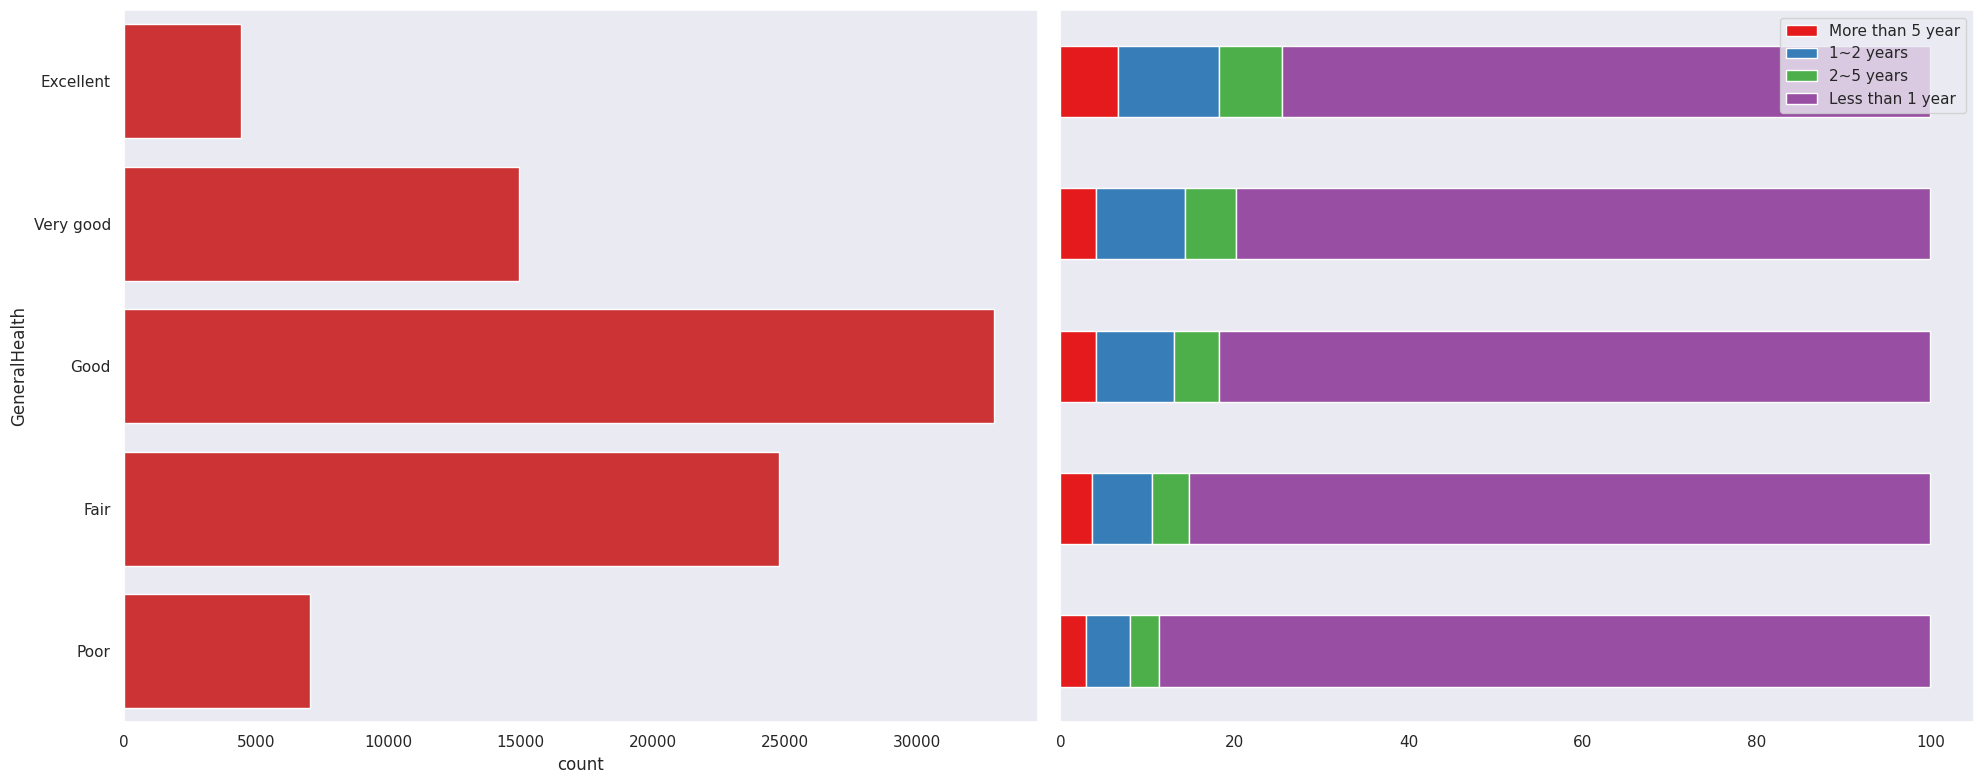

In [46]:
BMI30 = df.loc[df['BMI'] > 30 ] # Obesidad (segun fuentes)
BMI = df.loc[df['BMI'] <= 30 ]
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
order_of_bars_feel = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
legend = ['Within past year (anytime less than 12 months ago)',
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)',
       '5 or more years ago']
legend_alias = ['More than 5 year', '1~2 years', '2~5 years', 'Less than 1 year']
sns.countplot(y='GeneralHealth', data=BMI30, order=order_of_bars_feel,ax=ax1)
total = df.groupby(['GeneralHealth','LastCheckupTime']).size().unstack(fill_value=0)
total = total.div(total.sum(axis=1), axis=0) * 100
total = total.reindex(order_of_bars_feel[::-1])
total[legend]
ax = total.plot(kind='barh', stacked=True, ax=ax2)
ax2.legend(legend_alias, loc='upper right')
fig.tight_layout()

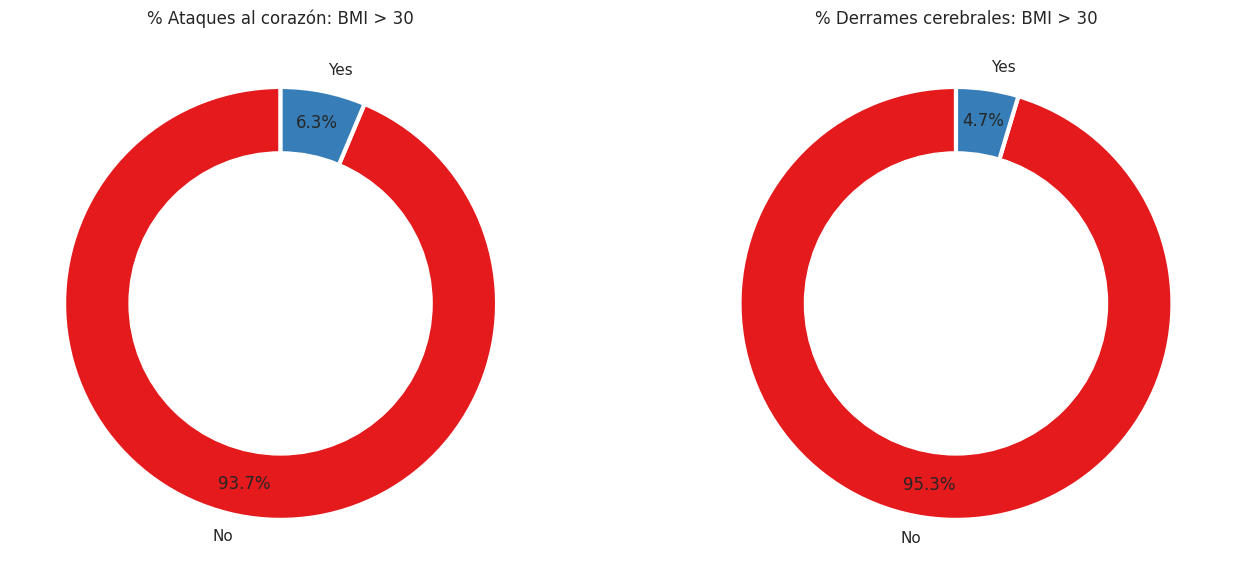

In [57]:
# Configurar el tamaño de la figura y los colores
plt.figure(figsize=(14, 6))
colors = sns.color_palette('Set1')

# Gráfico 1: Ataques al corazón
plt.subplot(1, 2, 1)
heart_attack = BMI30['HadHeartAttack'].value_counts()
plt.pie(heart_attack, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.title('% Ataques al corazón: BMI > 30')
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))

# Gráfico 2: Derrames cerebrales
plt.subplot(1, 2, 2)
stroke = BMI30['HadStroke'].value_counts()
plt.pie(stroke, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.title('% Derrames cerebrales: BMI > 30')
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))

plt.tight_layout()
plt.show()

# Armar un modelo que pueda predecir posibles personas que por su pedo y altura podrian ser propensos a tener un Ataque al corazon o un Derrame cerebral